In [8]:
import os
import openpnm as op
import pickle

In [9]:
files = ['ceramics_500cube_kriging',
 'carb71_s720cube_CAC',
 'soil_Ah-1_700cube_kiging',
 'carb_96558_720cube_CAC',
 'Urna22_710cube_CAC',]

In [10]:
with open(files[0], 'rb') as f:
    pn_extacted = pickle.load(f)

In [11]:
# project = op.Project()

In [12]:
import numpy as np
import porespy as ps

dirs_p = './samples/!TKirill'
im_dir = 'ceramics_500cube_kriging'

with open(os.path.join(dirs_p, im_dir, 'image3d'), 'rb') as f:
    im = np.fromfile(file=f, dtype=np.uint8)
side_size = round(im.size ** (1/3))
im = im.reshape([side_size] * 3)
im = np.where(im == 0, 0, 1).astype(np.bool)
        
pn_extracted = ps.networks.snow(im)

____________________________________________________________
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  17835
Peaks after trimming saddle points:  9864
Peaks after trimming nearby peaks:  9833
____________________________________________________________
Extracting pore and throat information from image


100%|██████████| 12476/12476 [02:13<00:00, 93.25it/s] 


In [13]:
pn = op.network.GenericNetwork()
pn.update(pn_extacted)

In [21]:
import matplotlib.pyplot as plt

―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    SOURCE: openpnm.topotools.topotools._scale_3d_axes 
    TIME STAMP: 2019-06-18 17:11:30,367    


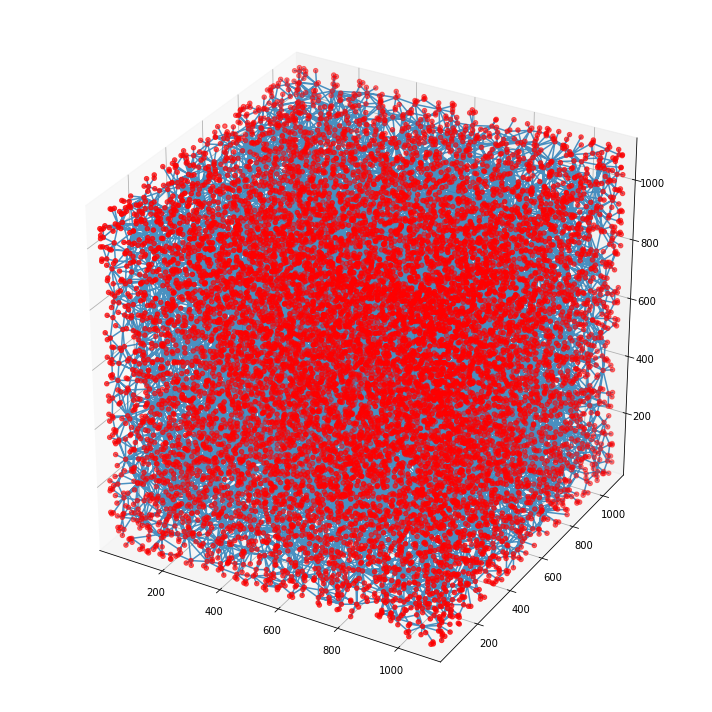

In [22]:
fig = op.topotools.plot_connections(network=pn, alpha=0.8)
fig = op.topotools.plot_coordinates(network=pn, fig=fig, color='r')
fig.set_size_inches(10, 10)
fig.tight_layout()
plt.savefig('1.jpg')

In [15]:
h = pn.check_network_health()

In [16]:
h

{'disconnected_clusters': [array([    0,     1,     2, ..., 12473, 12474, 12475]), array([  288, 10313, 11165]), array([ 2247, 10394, 11707]), array([ 1225, 11662]), array([ 5060, 11853]), array([ 5864, 11424]), array([ 4572, 11362]), array([ 4516, 11822]), array([ 6846, 11470]), array([3525, 9990]), array([2887, 9960]), array([ 8247, 10225]), array([ 1875, 11231]), array([ 5324, 10981]), array([956]), array([4452]), array([3153]), array([3270]), array([3348]), array([589]), array([3683]), array([3744]), array([4098]), array([4382]), array([4443]), array([366]), array([364]), array([981]), array([4550]), array([282]), array([4576]), array([4581]), array([4766]), array([219]), array([4816]), array([4847]), array([140]), array([5094]), array([3100]), array([3070]), array([2927]), array([2910]), array([1040]), array([925]), array([1437]), array([1651]), array([1679]), array([1723]), array([767]), array([1903]), array([1987]), array([2028]), array([724]), array([2255]), array([2379]), arra

In [18]:
h.health

False